# IMMAGINI

Librerie da utilizzare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io

## Immagini in scala di grigio

Ricordando che le immagini in scala di grigi possono essere rappresentate come delle matrici i cui elementi possono variare tra 0 e K-1, possiamo allora impostare l'immagine come:

In [2]:
# Carichiamo l'immagine
x = io.imread("dorian.jpg")

# Ricaviamo le dimensioni
(M,N) = x.shape

Tale codice, però, funziona solo se stiamo lavorando con immagini in un determinato formato. Se invece stiamo parlando di immagini di tipo bit raw, allora per leggerle abbiamo bisogno di conoscere:
- Dimensione dell'immagine M ed N
- Numero di bit dedicati ad ogni pixel

In [3]:
# Lettura dei dati da file bit-raw considerando la rappresentazione
# del livello di grigio codificata su 8 bit
x = np.fromfile("house.y", np.uint8)

# Posizionamento dei valori sui vari pixel tramite la dimensione
# dell'immagine, ovvero, 512x512 pixel
x = np.reshape(x, (512,512))

Per la visualizzazione delle immagini, invece, si può utilizzate Matplotlib nel seguente modo:

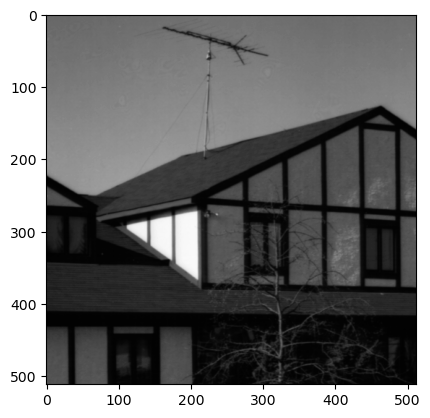

In [4]:
# Genero la finestra su cui andare a visualizzare i risultati
plt.figure(1)

# Plotto l'immagine sulla finestra target, specificando il range
# ed il colore ("gray")
plt.imshow(x, clim=[0,255], cmap="gray")


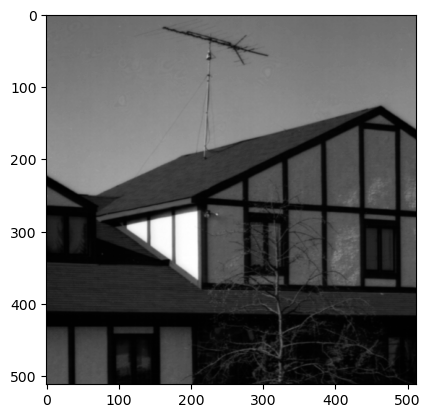

In [5]:
# Se non specifichiamo clim, la funzione prenderà i valori di min(x) e max(x)
# come limiti del range
plt.imshow(x,clim=None,cmap="gray")

### Salvataggio dell'immagine come jpg

Dopo aver processato l'immagine è possibile salvarla in un certo formato. Tramite tale salvataggio stiamo anche effettuando una compressione di tipo JPEG. La bontà della compressione è basata sull'attributo quality dato in ingresso alla funzione

In [15]:
x = np.uint8(x)
io.imsave("immagine70.jpg", x, quality=70)
io.imsave("immagine80.jpg", x, quality=100)
io.imsave("immagine40.jpg", x, quality=40)

Se l'immagine che però stiamo andando a comprimere è di tipo double, allora conviene eseguire il comando tofile. Ciò ci permetterà di non perdere informazione

In [6]:
# Vado a salvare l'immagine in un formato bit-raw
np.uint(8).tofile("immagine.y")

# Altro modo, andando a salvare la variabile x come:
np.save("immagine.npy", x)

# Per caricare l'immagine nei due casi precedenti ci basterà scrivere
x = np.load("immagine.npy")

## Immagini a colori

Le immagini a colori sono rappresentate su una matrice a 3 dimensioni. Di grandezza: M x N x 3, dove 3 indica la codifica additiva RGB

Text(0.5, 1.0, 'Componente Blu')

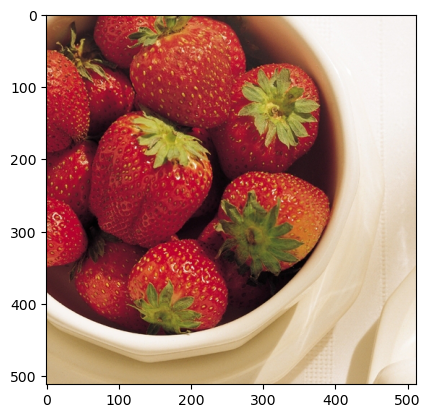

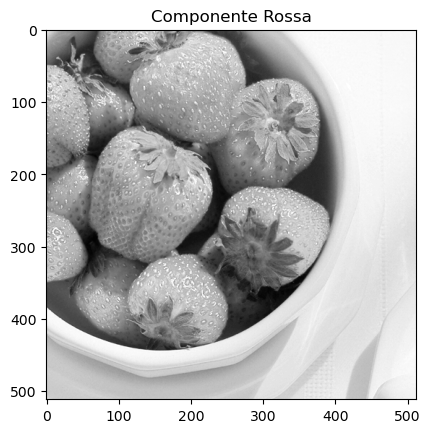

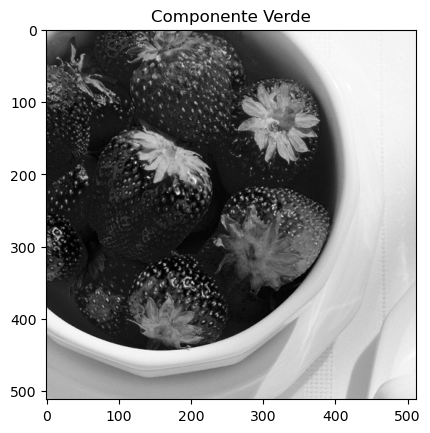

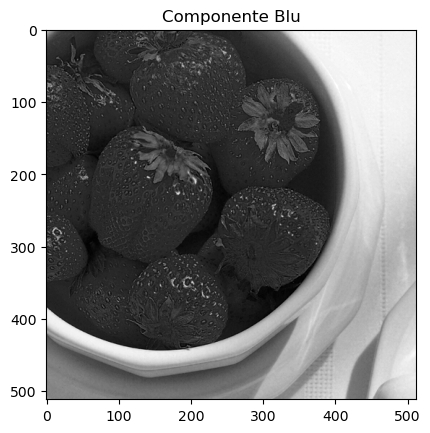

In [8]:
x = io.imread("fragole.jpg")
plt.figure()
plt.imshow(x)

R = x[:,:,0]
G = x[:,:,1]
B = x[:,:,2]

plt.figure()
plt.imshow(R, clim=[0,255], cmap="gray")
plt.title("Componente Rossa")

plt.figure()
plt.imshow(G, clim=[0,255], cmap="gray")
plt.title("Componente Verde")

plt.figure()
plt.imshow(B, clim=[0,255], cmap="gray")
plt.title("Componente Blu")

Eliminazione dell'incidenza del rosso

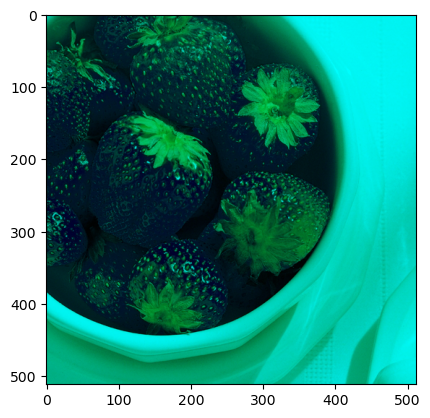

In [9]:
x = io.imread("fragole.jpg")
M = x.shape[0]
N = x.shape[1]
R = np.zeros((M,N), x.dtype)
y = np.stack((R,G,B), -1)
plt.figure()
plt.imshow(y)